In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("twitter_archive_master.csv")
df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Insight 1: Fonte dos tweets

In [4]:
df.source = df.source.str.extract(">(.*)</a>$")

In [86]:
a = df.source.value_counts()

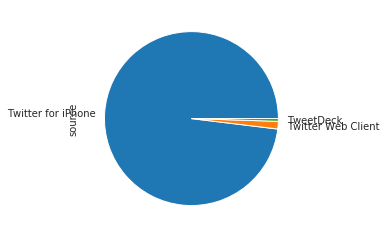

In [87]:
a.plot(kind="pie")

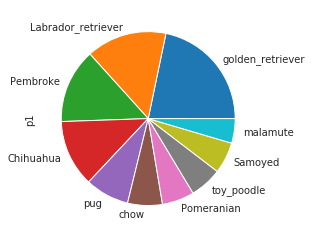

In [85]:
a.plot(kind="pie")

Text(0, 0.5, 'Quantidade de tweets')

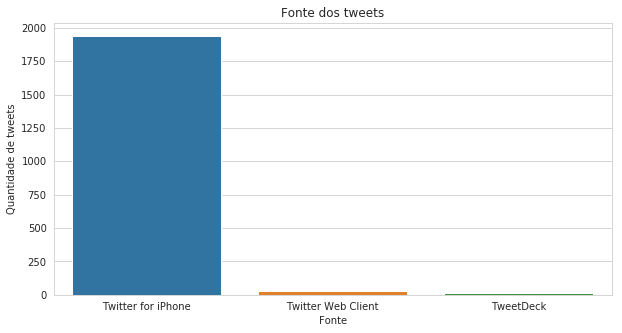

In [101]:
plt.figure(figsize=(10,5))
plt.title("Fonte dos tweets")
sns.countplot(df.source)
plt.xlabel("Fonte")
plt.ylabel("Quantidade de tweets")

# Insight 2: Top 10 das raças de cachorro

In [89]:
a = df.p1.value_counts()[:10]

Text(0, 0.5, '')

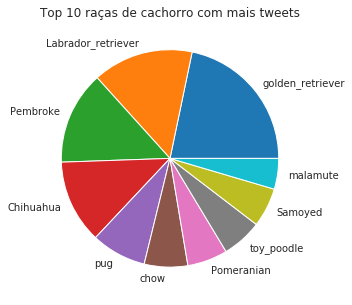

In [100]:
plt.figure(figsize=(14,5))
plt.title("Top 10 raças de cachorro com mais tweets")
a.plot(kind="pie")
plt.ylabel("")

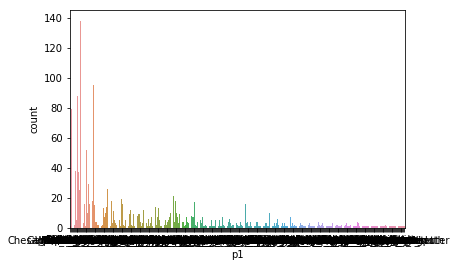

In [39]:
sns.barplot(df.p1)

# Insight 3: Média da quantidade de favoritagens

In [42]:
df.favorite_count.mean()

8772.740010116338

In [80]:
a = df.groupby("p1").describe()["favorite_count"]["mean"][:10]

Text(0, 0.5, 'Quantidade de favoritagens')

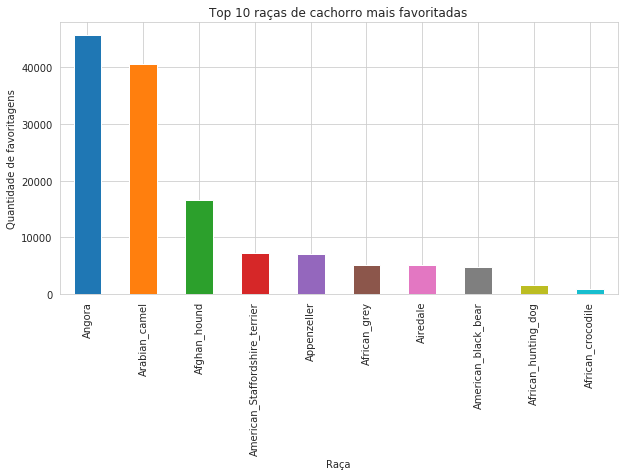

In [81]:
plt.figure(figsize=(10,5))
plt.title("Top 10 raças de cachorro mais favoritadas")
a.sort_values(ascending=False).plot.bar()
plt.xlabel("Raça")
plt.ylabel("Quantidade de favoritagens")

# Visualização: Quantidade de tweets do perfil WeRateDogs ao longo de quase 2 anos

In [52]:
df.created_at = df.created_at.apply(lambda data: pd.datetime(int(data[:4]), int(data[5:7]), int(data[8:10])))

In [68]:
a = df.groupby('created_at').describe()["favorite_count"]["count"]

In [76]:
sns.lineplot?

In [78]:
sns.set_style("whitegrid")

Text(0, 0.5, 'Quantidade de tweets')

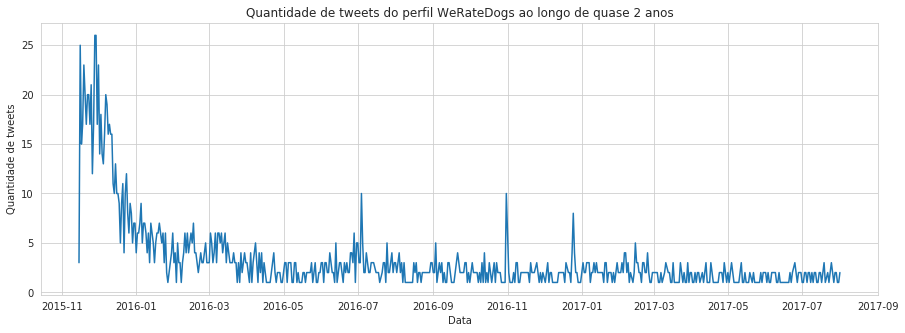

In [79]:
plt.figure(figsize=(15,5))
plt.title("Quantidade de tweets do perfil WeRateDogs ao longo de quase 2 anos")
sns.lineplot(x=a.index, y=a)
plt.xlabel("Data")
plt.ylabel("Quantidade de tweets")

In [54]:
sns.lineplot(df.created_at,x=df)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).